In [367]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np
import statistics
from scipy.stats import linregress


#Study files

music_norm_path = "songs_normalize.csv"

music_norm = pd.read_csv(music_norm_path, encoding = "utf-8-sig")
#convert duration from milliseconds to seconds and add new column to the df 

music_norm.head(-1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.0,0.3550,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.0,0.3470,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0,0.0845,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.0,0.0454,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.0,0.4670,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.0,0.1110,0.175,150.231,hip hop
1932,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.0,0.1060,0.952,137.958,pop
1933,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.0,0.1050,0.564,169.994,pop
1934,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.0,0.2740,0.811,97.984,"hip hop, country"


## Cleaning the Dataset

In [368]:
# Drop unused columns
music_norm = music_norm.drop(columns=['explicit', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'])

In [369]:
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,2000,86,5,-4.244,0,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,2000,68,7,-4.264,1,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...
1932,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1933,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1934,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1935,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


In [370]:
# Check for null values
missing_data_count = music_norm.isna().sum()
missing_data_count

#There is none (see below)

artist         0
song           0
duration_ms    0
year           0
popularity     0
key            0
loudness       0
mode           0
valence        0
tempo          0
genre          0
dtype: int64

In [371]:
# Check for duplicated rows
duplicated_rows = music_norm.duplicated()
music_norm[duplicated_rows].sort_values("song")

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
949,Lady Gaga,Bad Romance,294573,2009,80,0,-3.755,1,0.714,119.001,pop
1922,Post Malone,Better Now,231266,2018,80,10,-5.804,1,0.341,145.038,hip hop
1772,Jax Jones,Breathe,207629,2017,58,11,-5.520,0,0.686,125.985,"hip hop, pop, Dance/Electronic"
921,James Morrison,Broken Strings,250453,2008,70,1,-4.914,1,0.321,111.910,"pop, R&B"
1389,Ellie Goulding,Burn,231211,2014,70,1,-5.031,1,0.329,87.016,"pop, rock, Dance/Electronic"
1672,Rob $tone,Chill Bill (feat. J. Davi$ & Spooks),177184,2016,76,6,-10.028,1,0.230,108.034,hip hop
333,Coldplay,Clocks,307879,2002,79,5,-7.215,0,0.255,130.970,"rock, pop"
777,Soulja Boy,Crank That (Soulja Boy),221933,2007,74,0,-2.180,1,0.803,140.141,"hip hop, pop"
758,September,Cry for You,209800,2007,65,9,-3.988,1,0.961,130.018,"pop, Dance/Electronic"
647,The All-American Rejects,Dirty Little Secret,193653,2005,65,10,-4.253,1,0.462,143.853,"rock, pop"


In [372]:
# drop duplicated values
music_norm = music_norm.drop_duplicates()
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,2000,86,5,-4.244,0,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,2000,68,7,-4.264,1,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...
1932,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1933,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1934,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1935,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


### Find all unique genres

In [373]:
unique_genre = len(music_norm["genre"].unique())
unique_genre

57

In [374]:
unique_artists = music_norm["artist"].unique()
unique_artists 

array(['Britney Spears', 'Bon Jovi', '*NSYNC', 'Eminem',
       'Robbie Williams', 'Modjo', "Gigi D'Agostino", "Bomfunk MC's",
       'Aaliyah', 'Alice Deejay', 'Linkin Park', 'Sonique', 'M.O.P.',
       'Limp Bizkit', 'Darude', 'Da Brat', 'Moloko', 'Chicane',
       'Debelah Morgan', 'Madonna', 'Ruff Endz', 'Kylie Minogue',
       'LeAnn Rimes', 'Avant', 'Toni Braxton', 'Bow Wow',
       'Samantha Mumba', 'Mýa', 'Mary Mary', 'Next', 'Janet Jackson',
       'Ricky Martin', 'Jagged Edge', 'JAY-Z', 'Baha Men', 'Oasis',
       'DJ Ötzi', 'P!nk', 'Mariah Carey', 'Craig David', 'Sammie',
       'Kandi', 'Vengaboys', 'Ronan Keating', '3 Doors Down',
       'Carl Thomas', 'Mystikal', 'Fuel', 'Westlife', 'All Saints',
       "Destiny's Child", 'Erykah Badu', 'Matchbox Twenty', 'Gabrielle',
       'Backstreet Boys', 'The Corrs', 'Joe', 'Nelly', 'Shaggy',
       'Christina Aguilera', 'Nelly Furtado', 'Shakira',
       'Jimmy Eat World', 'Train', 'Geri Halliwell', 'Blu Cantrell',
       'Missy El

In [375]:
# unique_song = music_norm["song"].unique().sort_values()
# unique_song
unique_song = music_norm["song"].unique()
print(sorted(unique_song))

['#SELFIE - Original Mix', '#thatPOWER', "'Till I Collapse", '(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version', '...Ready For It?', "03' Bonnie & Clyde", '1 Thing', '1, 2 Step (feat. Missy Elliott) - Main', '1, 2, 3 (feat. Jason Derulo & De La Ghetto)', '17', '1955', '1973', '2 On (feat. ScHoolboy Q)', '2 Phones', '2002', '21 Guns', '21 Questions', '21 Seconds', '212', '22', '24K Magic', '2U (feat. Justin Bieber)', '3 Nights', '3005', '4 Minutes (feat. Justin Timberlake & Timbaland)', '4 My People (feat. Eve)', '6 Foot 7 Foot', '679 (feat. Remy Boyz)', '7 Days', '7 rings', '711', 'A Little Less Conversation - JXL Radio Edit Remix', 'A Milli', 'A Moment Like This', 'A New Day Has Come - Radio Remix', 'A Sky Full of Stars', 'A Thousand Miles', 'A Thousand Years', "A Woman's Worth", 'AM To PM', 'About You Now', "Acceptable in the 80's", 'Adan y Eva', 'Addicted', 'Addictive', 'Adventure of a Lifetime', 'Again', 'Against All Odds (Take A Look at Me Now) (feat. Westlif

In [376]:
def filter_genre(genre): 
    # genre='rock'
    filter_df=music_norm['genre'].str.contains(genre)
    small_df=music_norm.loc[filter_df, :]
    small_df.head()
    return len(small_df)

In [377]:
genre_list=music_norm['genre'].str.split(', ').explode().unique()
genre_list

array(['pop', 'rock', 'metal', 'hip hop', 'Dance/Electronic', 'R&B',
       'country', 'latin', 'Folk/Acoustic', 'easy listening',
       'World/Traditional', 'blues', 'jazz', 'classical'], dtype=object)

In [378]:
for each_genre in genre_list: 
    count=filter_genre(each_genre)
    print(f'{each_genre} contains {count} records')

pop contains 1550 records
rock contains 217 records
metal contains 61 records
hip hop contains 741 records
Dance/Electronic contains 377 records
R&B contains 428 records
country contains 19 records
latin contains 60 records
Folk/Acoustic contains 19 records
easy listening contains 6 records
World/Traditional contains 9 records
blues contains 3 records
jazz contains 2 records
classical contains 1 records


In [379]:
# Split the values in the column
genres = music_norm["genre"].str.split(',', expand=True)
# Convert the list of values into separate rows
# genres = genres.explode("genre")
# Find the unique values
# genres.unique()

In [380]:
genres #test

,0,1,2,3
0,pop,None,None,None
1,rock,metal,None,None
2,pop,None,None,None
3,hip hop,None,None,None
4,pop,rock,None,None
...,...,...,...,...
1932,pop,None,None,None
1933,pop,None,None,None
1934,hip hop,country,None,None
1935,pop,None,None,None


### Analyzing Popularity

#### Popular genre & how they have changed 10 years - Grace

In [381]:
# Grab genre and year and create a new dataframe.
genre_pop_year = music_norm.loc[:,["year","genre","popularity"]]
genre_pop_year

,year,genre,popularity
0,2000,pop,77
1,2000,"rock, metal",78
2,2000,pop,65
3,2000,hip hop,86
4,2000,"pop, rock",68
...,...,...,...
1932,2019,pop,79
1933,2019,pop,78
1934,2019,"hip hop, country",69
1935,2019,pop,75


In [382]:
genre_list


array(['pop', 'rock', 'metal', 'hip hop', 'Dance/Electronic', 'R&B',
       'country', 'latin', 'Folk/Acoustic', 'easy listening',
       'World/Traditional', 'blues', 'jazz', 'classical'], dtype=object)


Hypothesis: Pop is a consistently popular genre through the years of 2000 to 2020. 
Null Hypothesis: Average popularity of the genre Pop will be consistently over 50% in the years of 2000 to 2020. 
Alternative Hypothesis: Average popularity of the genre Pop will not be consistently over 50% in the years of 2000 to 2020. 
Observation: Pop remains within the 55 to 65% average popularity throughout 2000 to 2020.The 1998 and 2020 data might have to be discounted, as this dataset was meant for 2019 to 2020. 
Conclusion: In the years 2000 to 2019, the genre pop remains above 50% popularity. In 2020, average popularity seems to have tapered off to below 40%, but this may be due to the incompleteness of the dataset around the first and last years.
    


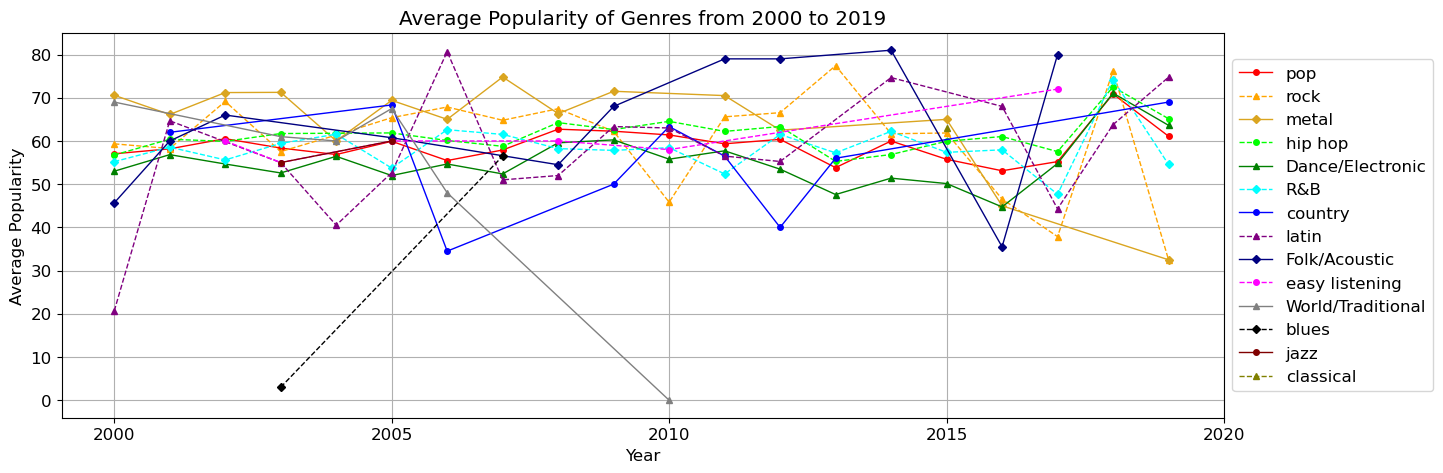

In [383]:
# Create color list, line style list, and counter for the for loop
colors = ["red", "orange", "goldenrod", "lime", "green", "cyan", "blue", "purple", "navy", "magenta", "grey", "black", "maroon", "olive"]
line_styles = ["-","--"] # for accessibility
markers = ["o","^", "D"] # for accessibility
counter = 0

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_list:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4, # Set size of markers
             color=colors[counter], #Set line colors to colors in list. 
             linestyle=line_styles[counter % 2], # vary line style
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.title("Average Popularity of Genres from 2000 to 2019")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5)) #set x ticks at year 2000 to 2020, with 5 year intervals in between. 

print("""
Hypothesis: Pop is a consistently popular genre through the years of 2000 to 2020. 
Null Hypothesis: Average popularity of the genre Pop will be consistently over 50% in the years of 2000 to 2020. 
Alternative Hypothesis: Average popularity of the genre Pop will not be consistently over 50% in the years of 2000 to 2020. 
Observation: Pop remains within the 55 to 65% average popularity throughout 2000 to 2020.The 1998 and 2020 data might have to be discounted, as this dataset was meant for 2019 to 2020. 
Conclusion: In the years 2000 to 2019, the genre pop remains above 50% popularity. In 2020, average popularity seems to have tapered off to below 40%, but this may be due to the incompleteness of the dataset around the first and last years.
    """)

# Save file
plt.savefig("Images/Grace_PopularityvsGenre_1.png", bbox_inches='tight')


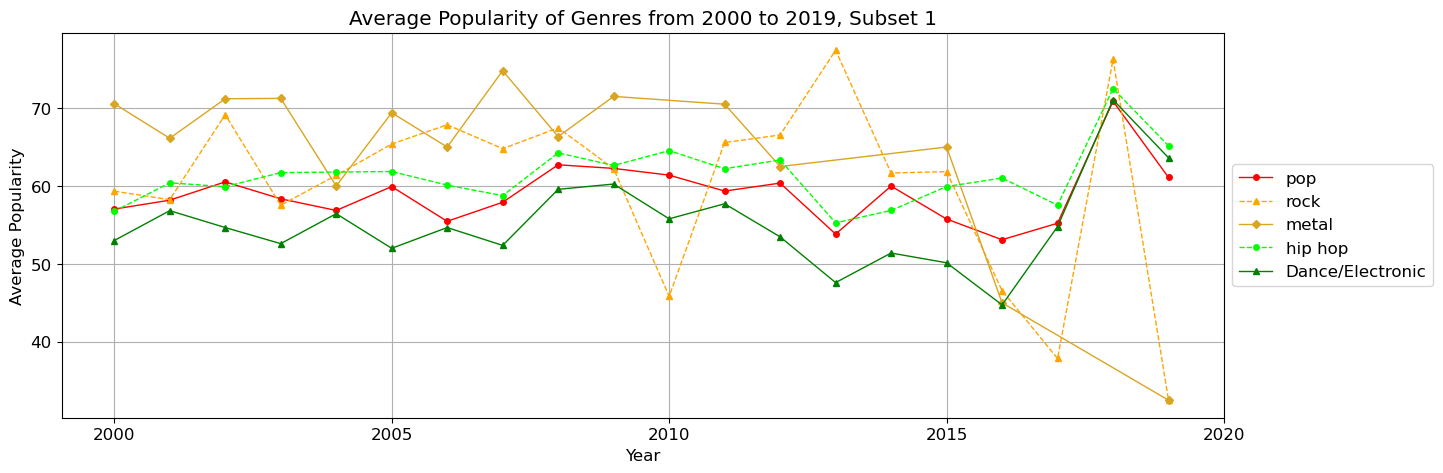

In [384]:
# Place five genres in container
genre_container_1 = ['pop', 'rock', 'metal', 'hip hop', 'Dance/Electronic']

# Reset counter
counter = 0

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_container_1:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4,
             color=colors[counter], 
             linestyle=line_styles[counter % 2],
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #place legend outside of graph. 
plt.title("Average Popularity of Genres from 2000 to 2019, Subset 1")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5)) #set x ticks at year 2000 to 2020, with 5 year intervals in between. 

# Save file
plt.savefig("Images/Grace_GenrevYear_1.png", bbox_inches='tight')

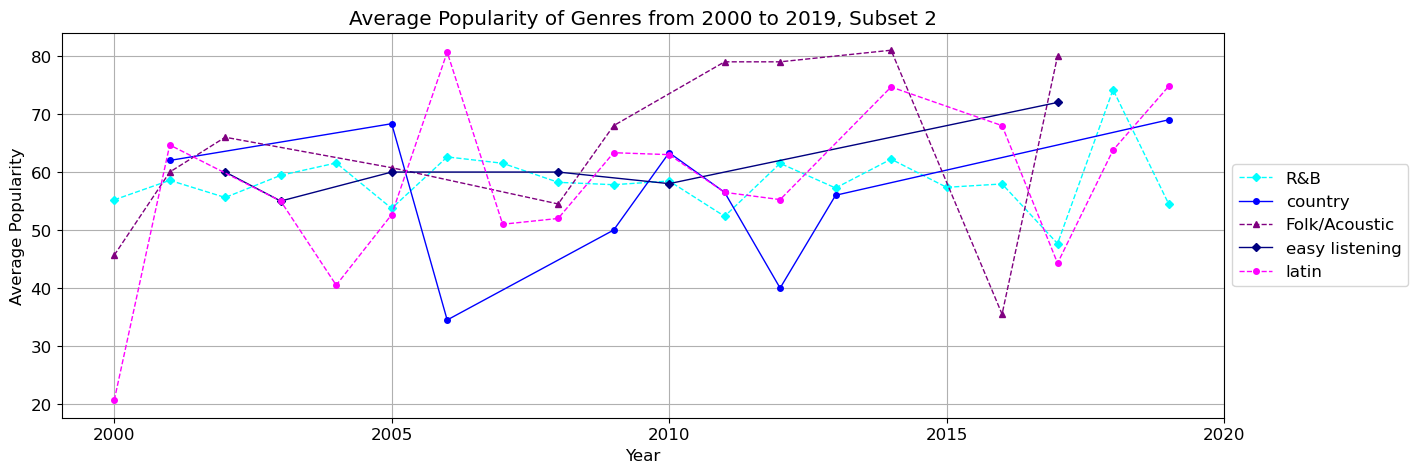

In [385]:
# Place five genres in container
genre_container_2 = ["R&B", 'country', 'Folk/Acoustic', 'easy listening', 'latin']

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_container_2:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4,
             color=colors[counter], 
             linestyle=line_styles[counter % 2],
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.title("Average Popularity of Genres from 2000 to 2019, Subset 2")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5)) # Set xticks in intervals of five years. 

# Save file
plt.savefig("Images/Grace_GenrevYear_2.png", bbox_inches='tight')

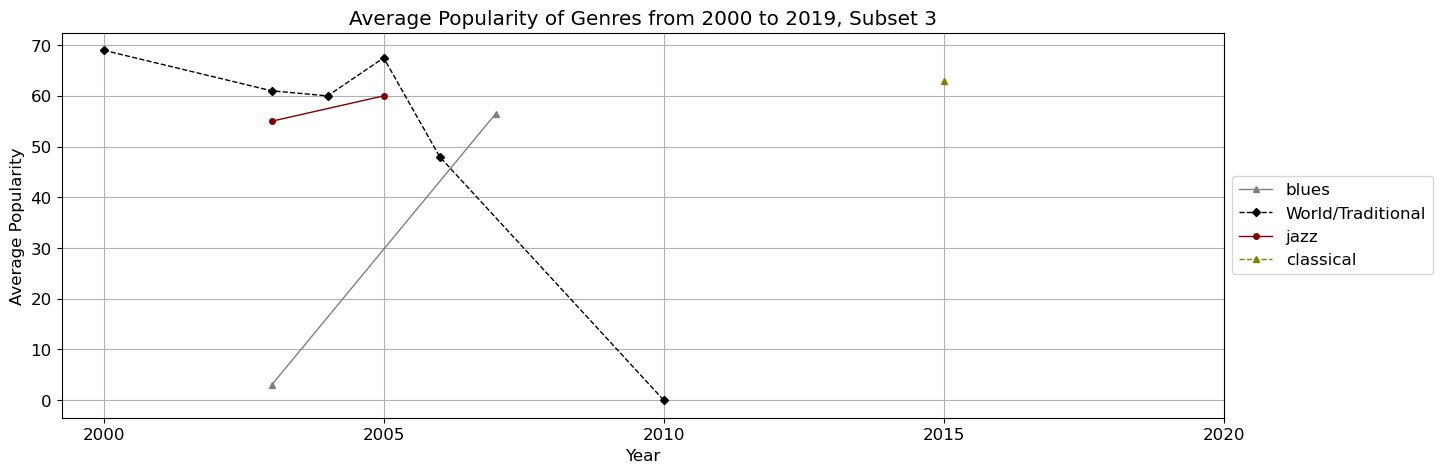

In [386]:
genre_container_3 = ['blues', 'World/Traditional', 'jazz', 'classical']

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_container_3:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4,
             color=colors[counter], 
             linestyle=line_styles[counter % 2],
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.title("Average Popularity of Genres from 2000 to 2019, Subset 3")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5)) # Arrange xticks in intervals in five years

#Save file
plt.savefig("Images/Grace_GenrevYear_3.png", bbox_inches='tight') 



#### Length of Song vs Popularity - Daniel


The r-squared is: 0.002  Line Eq: y = 0.08x + 223.51   Median Song Length: 223.03


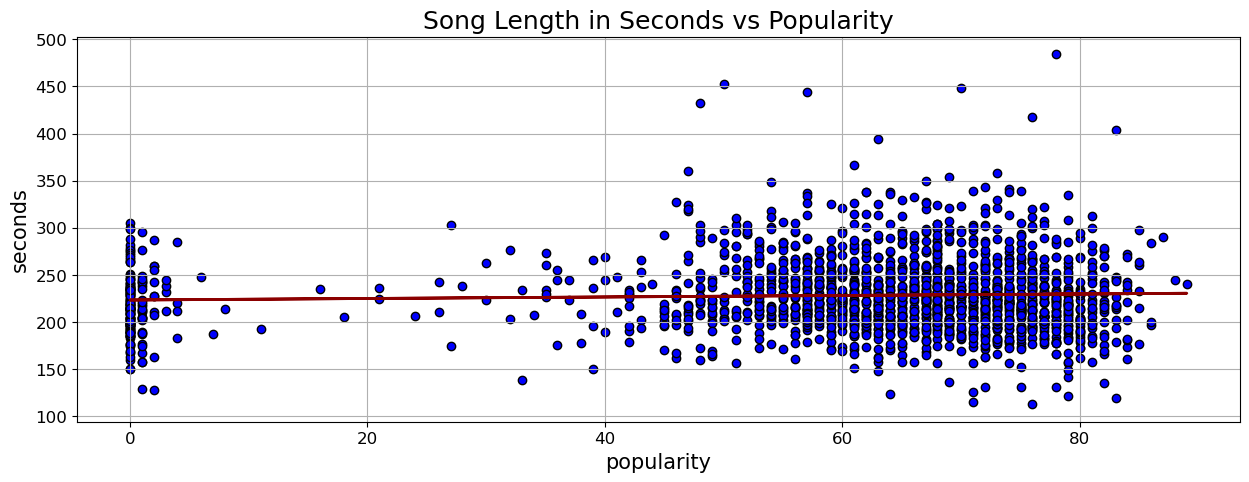


 Hypothesis: If song length can be used as an indicator to determine its popularity.
 Null Hypothesis: There is no significant correlation between song length and its popularity.
 Alternative Hypothesis: Song length is an indicator of song popularity.
  


In [387]:
#Length of Song vs Popularity - Daniel
#Creating a DataFrame
          
LengthVSPop_df = pd.DataFrame(music_norm)

# #Creating x and y values
x_values = LengthVSPop_df["popularity"]
y_values = LengthVSPop_df["duration_ms"]/1000

song_length_median = statistics.median(y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)
plt.grid()
plt.title("Song Length in Seconds vs Popularity",fontsize=18)

plt.ylabel("seconds", fontsize=15, color="black")
plt.xlabel("popularity", fontsize=15, color="black")

#Save file
plt.savefig("Images/Daniel_LengthvPop.png", bbox_inches='tight') 


print(f"\nThe r-squared is: {round((rvalue**2),4)}  Line Eq: {line_eq}   Median Song Length: {round((song_length_median),2)}")
plt.show()
print("\n Hypothesis: If song length can be used as an indicator to determine its popularity."
        "\n Null Hypothesis: There is no significant correlation between song length and its popularity."
        "\n Alternative Hypothesis: Song length is an indicator of song popularity."
        "\n  ")

#### Loudness vs popularity - Bree

In [388]:
# separate the original DataFrame by year into 4 new DataFrames
df2000 = music_norm[music_norm['year'] == 2000]
df2001 = music_norm[music_norm['year'] == 2001]
df2002 = music_norm[music_norm['year'] == 2002]
df2003 = music_norm[music_norm['year'] == 2003]
df2004 = music_norm[music_norm['year'] == 2004]

df2005 = music_norm[music_norm['year'] == 2005]
df2006 = music_norm[music_norm['year'] == 2006]
df2007 = music_norm[music_norm['year'] == 2007]
df2008 = music_norm[music_norm['year'] == 2008]
df2009 = music_norm[music_norm['year'] == 2009]

df2010 = music_norm[music_norm['year'] == 2010]
df2011 = music_norm[music_norm['year'] == 2011]
df2012 = music_norm[music_norm['year'] == 2012]
df2013 = music_norm[music_norm['year'] == 2013]
df2014 = music_norm[music_norm['year'] == 2014]

df2015 = music_norm[music_norm['year'] == 2015]
df2016 = music_norm[music_norm['year'] == 2016]
df2017 = music_norm[music_norm['year'] == 2017]
df2018 = music_norm[music_norm['year'] == 2018]
df2019 = music_norm[music_norm['year'] == 2019]

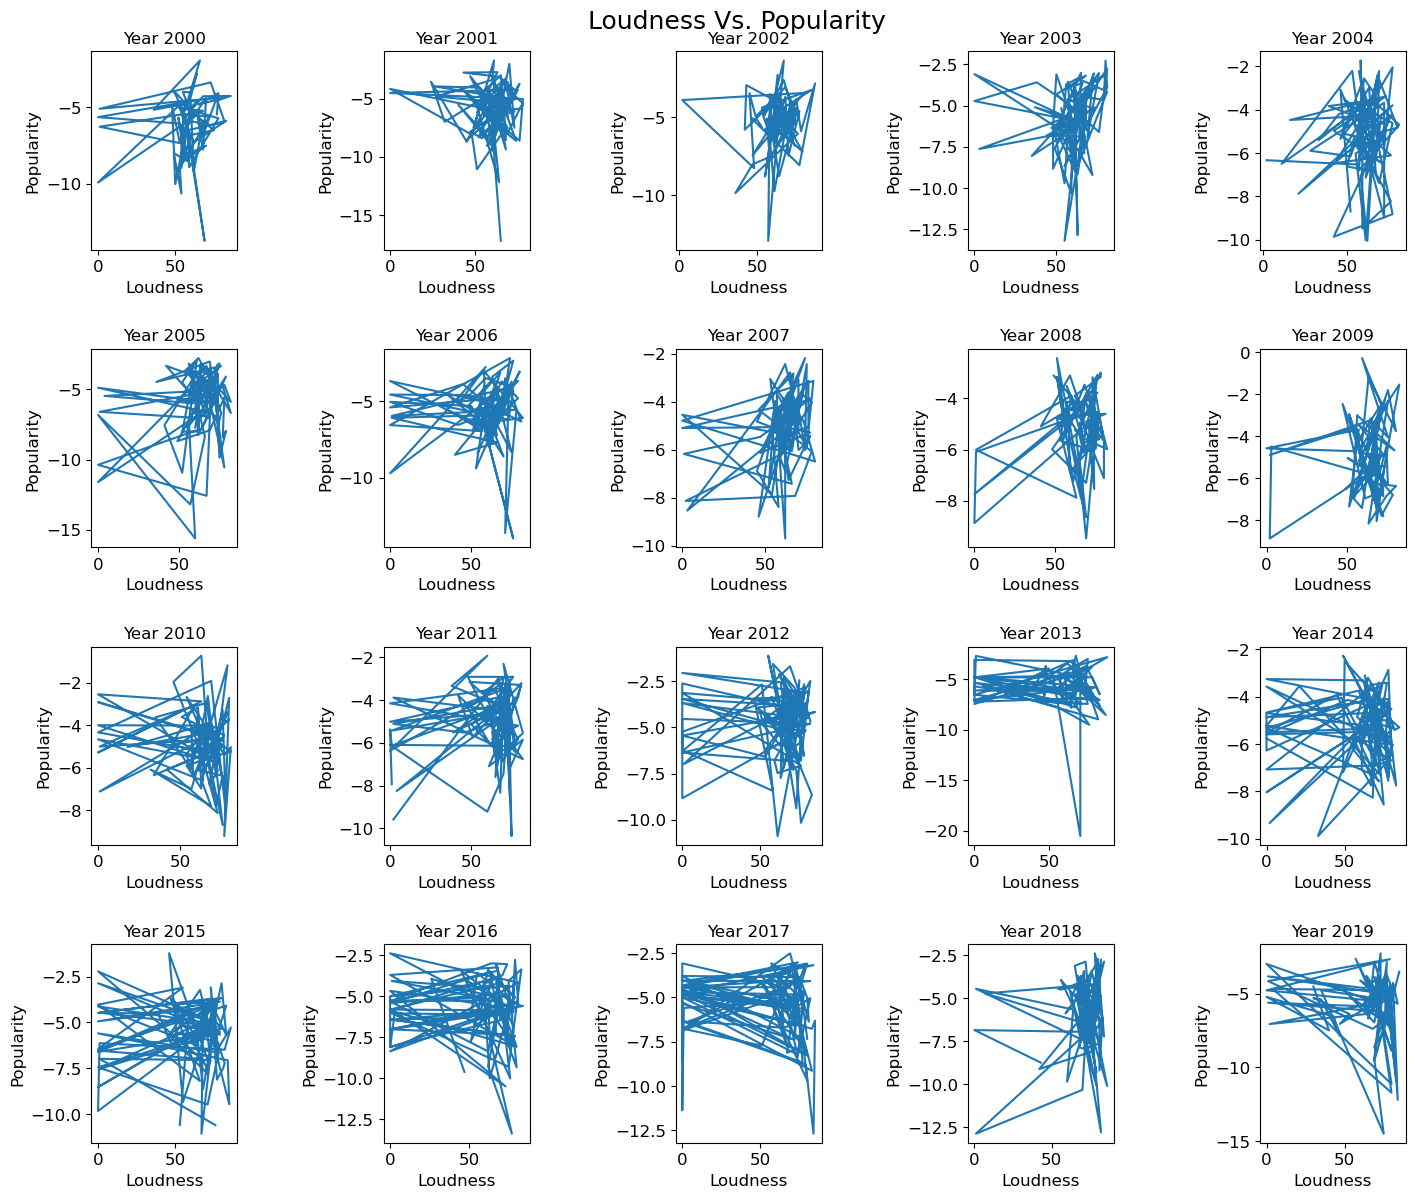

In [389]:
# plot each DataFrame on a separate subplot
fig, ax = plt.subplots(4, 5, figsize=(14, 12))
plt.rcParams['font.size'] = 12
fig.suptitle("Loudness Vs. Popularity", fontsize=18)

fig.tight_layout()  
fig.subplots_adjust(hspace=.5, wspace=1)

ax[0][0].plot(df2000['popularity'], df2000['loudness'])
ax[0][0].set_title('Year 2000', fontsize=12)
ax[0][0].set_xlabel("Loudness",fontsize=12)
ax[0][0].set_ylabel("Popularity",fontsize=12)
ax[0][1].plot(df2001['popularity'], df2001['loudness'])
ax[0][1].set_title('Year 2001',fontsize=12)
ax[0][1].set_xlabel("Loudness",fontsize=12)
ax[0][1].set_ylabel("Popularity",fontsize=12)
ax[0][2].plot(df2002['popularity'], df2002['loudness'])
ax[0][2].set_title('Year 2002',fontsize=12)
ax[0][2].set_xlabel("Loudness",fontsize=12)
ax[0][2].set_ylabel("Popularity",fontsize=12)
ax[0][3].plot(df2003['popularity'], df2003['loudness'])
ax[0][3].set_title('Year 2003',fontsize=12)
ax[0][3].set_xlabel("Loudness",fontsize=12)
ax[0][3].set_ylabel("Popularity",fontsize=12)
ax[0][4].plot(df2004['popularity'], df2004['loudness'])
ax[0][4].set_title('Year 2004',fontsize=12)
ax[0][4].set_xlabel("Loudness",fontsize=12)
ax[0][4].set_ylabel("Popularity",fontsize=12)


ax[1][0].plot(df2005['popularity'], df2005['loudness'])
ax[1][0].set_title('Year 2005',fontsize=12)
ax[1][0].set_xlabel("Loudness",fontsize=12)
ax[1][0].set_ylabel("Popularity",fontsize=12)
ax[1][1].plot(df2006['popularity'], df2006['loudness'])
ax[1][1].set_title('Year 2006',fontsize=12)
ax[1][1].set_xlabel("Loudness",fontsize=12)
ax[1][1].set_ylabel("Popularity",fontsize=12)
ax[1][2].plot(df2007['popularity'], df2007['loudness'])
ax[1][2].set_title('Year 2007',fontsize=12)
ax[1][2].set_xlabel("Loudness",fontsize=12)
ax[1][2].set_ylabel("Popularity",fontsize=12)
ax[1][3].plot(df2008['popularity'], df2008['loudness'])
ax[1][3].set_title('Year 2008',fontsize=12)
ax[1][3].set_xlabel("Loudness",fontsize=12)
ax[1][3].set_ylabel("Popularity",fontsize=12)
ax[1][4].plot(df2009['popularity'], df2009['loudness'])
ax[1][4].set_title('Year 2009',fontsize=12)
ax[1][4].set_xlabel("Loudness",fontsize=12)
ax[1][4].set_ylabel("Popularity",fontsize=12)


ax[2][0].plot(df2010['popularity'], df2010['loudness'])
ax[2][0].set_title('Year 2010',fontsize=12)
ax[2][0].set_xlabel("Loudness",fontsize=12)
ax[2][0].set_ylabel("Popularity",fontsize=12)
ax[2][1].plot(df2011['popularity'], df2011['loudness'])
ax[2][1].set_title('Year 2011',fontsize=12)
ax[2][1].set_xlabel("Loudness",fontsize=12)
ax[2][1].set_ylabel("Popularity",fontsize=12)
ax[2][2].plot(df2012['popularity'], df2012['loudness'])
ax[2][2].set_title('Year 2012',fontsize=12)
ax[2][2].set_xlabel("Loudness",fontsize=12)
ax[2][2].set_ylabel("Popularity",fontsize=12)
ax[2][3].plot(df2013['popularity'], df2013['loudness'])
ax[2][3].set_title('Year 2013',fontsize=12)
ax[2][3].set_xlabel("Loudness",fontsize=12)
ax[2][3].set_ylabel("Popularity",fontsize=12)
ax[2][4].plot(df2014['popularity'], df2014['loudness'])
ax[2][4].set_title('Year 2014',fontsize=12)
ax[2][4].set_xlabel("Loudness",fontsize=12)
ax[2][4].set_ylabel("Popularity",fontsize=12)


ax[3][0].plot(df2015['popularity'], df2015['loudness'])
ax[3][0].set_title('Year 2015',fontsize=12)
ax[3][0].set_xlabel("Loudness",fontsize=12)
ax[3][0].set_ylabel("Popularity",fontsize=12)
ax[3][1].plot(df2016['popularity'], df2016['loudness'])
ax[3][1].set_title('Year 2016',fontsize=12)
ax[3][1].set_xlabel("Loudness",fontsize=12)
ax[3][1].set_ylabel("Popularity",fontsize=12)
ax[3][2].plot(df2017['popularity'], df2017['loudness'])
ax[3][2].set_title('Year 2017',fontsize=12)
ax[3][2].set_xlabel("Loudness",fontsize=12)
ax[3][2].set_ylabel("Popularity",fontsize=12)
ax[3][3].plot(df2018['popularity'], df2018['loudness'])
ax[3][3].set_title('Year 2018',fontsize=12)
ax[3][3].set_xlabel("Loudness",fontsize=12)
ax[3][3].set_ylabel("Popularity",fontsize=12)
ax[3][4].plot(df2019['popularity'], df2019['loudness'])
ax[3][4].set_title('Year 2019',fontsize=12)
ax[3][4].set_xlabel("Loudness",fontsize=12)
ax[3][4].set_ylabel("Popularity",fontsize=12)

plt.savefig('Images/loudness2.png')
plt.show()


C:\Users\grace\AppData\Local\Temp\ipykernel_23388\3273046570.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")


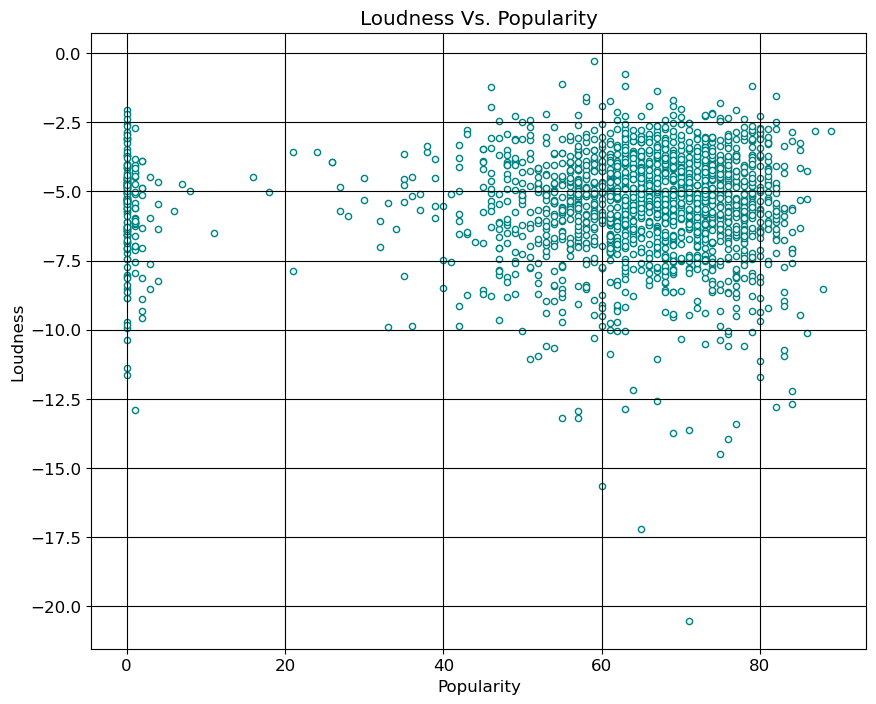

In [390]:
plt.figure(figsize=(10, 8))
plt.scatter(music_norm["popularity"],music_norm["loudness"],color="azure",edgecolor='teal', s=20)

# Incorporate the other graph properties
plt.title("Loudness Vs. Popularity")
plt.xlabel("Popularity")
plt.ylabel("Loudness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")



# Show plot
plt.savefig('Images/loudness1.png')
plt.show()


#### Popularity Vs Loudness Analysis: There is no strong correlation between loudness and popularity. 

#### Loudness vs year- Daniel

-5.273  -5.497245740836345  1.9286767285087072


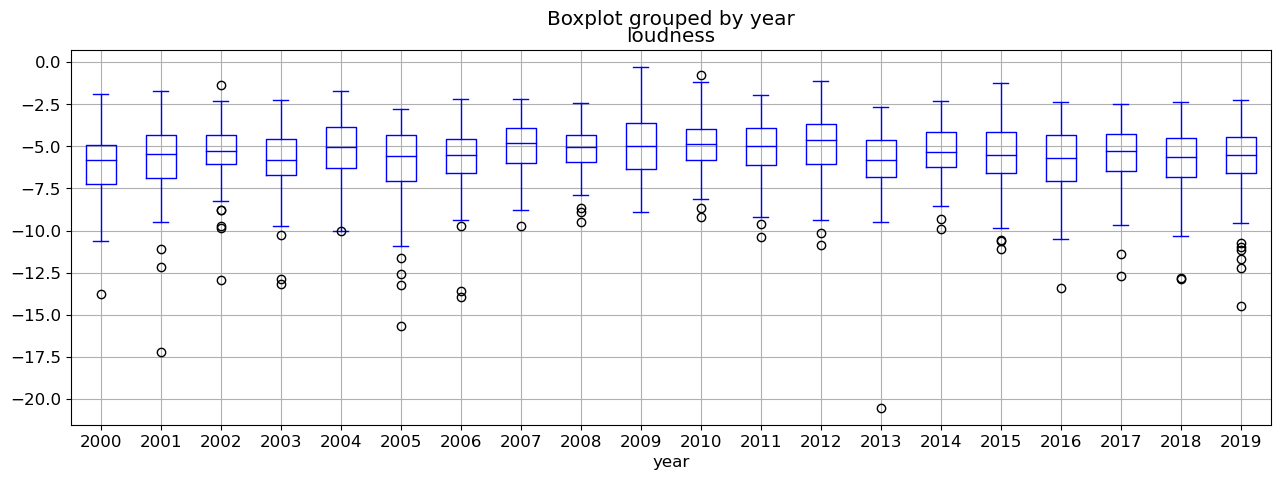

In [420]:
#Creating a DataFrame
LoudnessVSYr_df = pd.DataFrame(music_norm)
#Creating x and y values
x_values = LoudnessVSYr_df["year"]
y_values = LoudnessVSYr_df["loudness"]
song_loudness_median = statistics.median(y_values)
song_loudness_mean = statistics.mean(y_values)
song_loudness_std = statistics.pstdev(y_values)


                                     
print(f"{song_loudness_median}  {song_loudness_mean}  {song_loudness_std}")

plt.rcParams['figure.figsize'] = (15,5)
LoudnessVSYr_df.boxplot(by ="year", grid='True',column =["loudness"], color="blue")

# Show plot
plt.savefig('Images/Daniel_loudnessvyear.png')


mean = LoudnessVSYr_df["loudness"].groupby(LoudnessVSYr_df["year"]).mean()
median = LoudnessVSYr_df["loudness"].groupby(LoudnessVSYr_df["year"]).median()
std = LoudnessVSYr_df["loudness"].groupby(LoudnessVSYr_df["year"]).std()
statistics_table = pd.DataFrame({"Mean Loudness by Year":mean, 
                            "Median Loudness by Year":median, 
                            "Std. Dev. Loudness by Year":std})
# statistics_table.head(-1)



####	Duration vs Year- Bree



In [392]:
#convert duration from milliseconds to seconds and then add new column to the df

music_norm_path = "songs_normalize.csv"

music_norm = pd.read_csv(music_norm_path, encoding = "utf-8-sig")

music_norm['duration_s']=music_norm['duration_ms']/1000
music_norm.head(-1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.0,0.3550,0.894,95.053,pop,211.160
1,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.0,0.3470,0.544,119.992,"rock, metal",224.493
2,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0,0.0845,0.879,172.656,pop,200.560
3,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.0,0.0454,0.760,104.504,hip hop,284.200
4,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.0,0.4670,0.861,103.035,"pop, rock",258.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.0,0.1110,0.175,150.231,hip hop,174.960
1932,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.0,0.1060,0.952,137.958,pop,181.026
1933,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.0,0.1050,0.564,169.994,pop,178.426
1934,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.0,0.2740,0.811,97.984,"hip hop, country",200.593


In [393]:
#calculate the average duration vs year
avgdur_year=music_norm.groupby(pd.PeriodIndex(music_norm['year'], freq="y"))['duration_s'].mean().reset_index()
avgdur_year.set_index('year', inplace=True)
avgdur_year

,duration_s
year,
2000,249.993068
2001,242.450065
2002,253.993753
2003,236.334639
2004,233.966533
2005,236.967825
2006,239.061330
2007,231.326500
2008,235.675247


In [394]:
#calculate the max duration vs year
maxdur_year=music_norm.groupby(pd.PeriodIndex(music_norm['year'], freq="y"))['duration_s'].max().reset_index()
maxdur_year.set_index('year', inplace=True)
maxdur_year

,duration_s
year,
2000,452.906
2001,340.920
2002,432.146
2003,366.733
2004,336.506
2005,393.813
2006,448.573
2007,333.680
2008,338.853


In [395]:
#calculate the min duration vs year
mindur_year=music_norm.groupby(pd.PeriodIndex(music_norm['year'], freq="y"))['duration_s'].min().reset_index()
mindur_year.set_index('year', inplace=True)
mindur_year

,duration_s
year,
2000,175.893
2001,165.853
2002,161.240
2003,162.600
2004,171.360
2005,168.879
2006,151.640
2007,165.120
2008,148.186


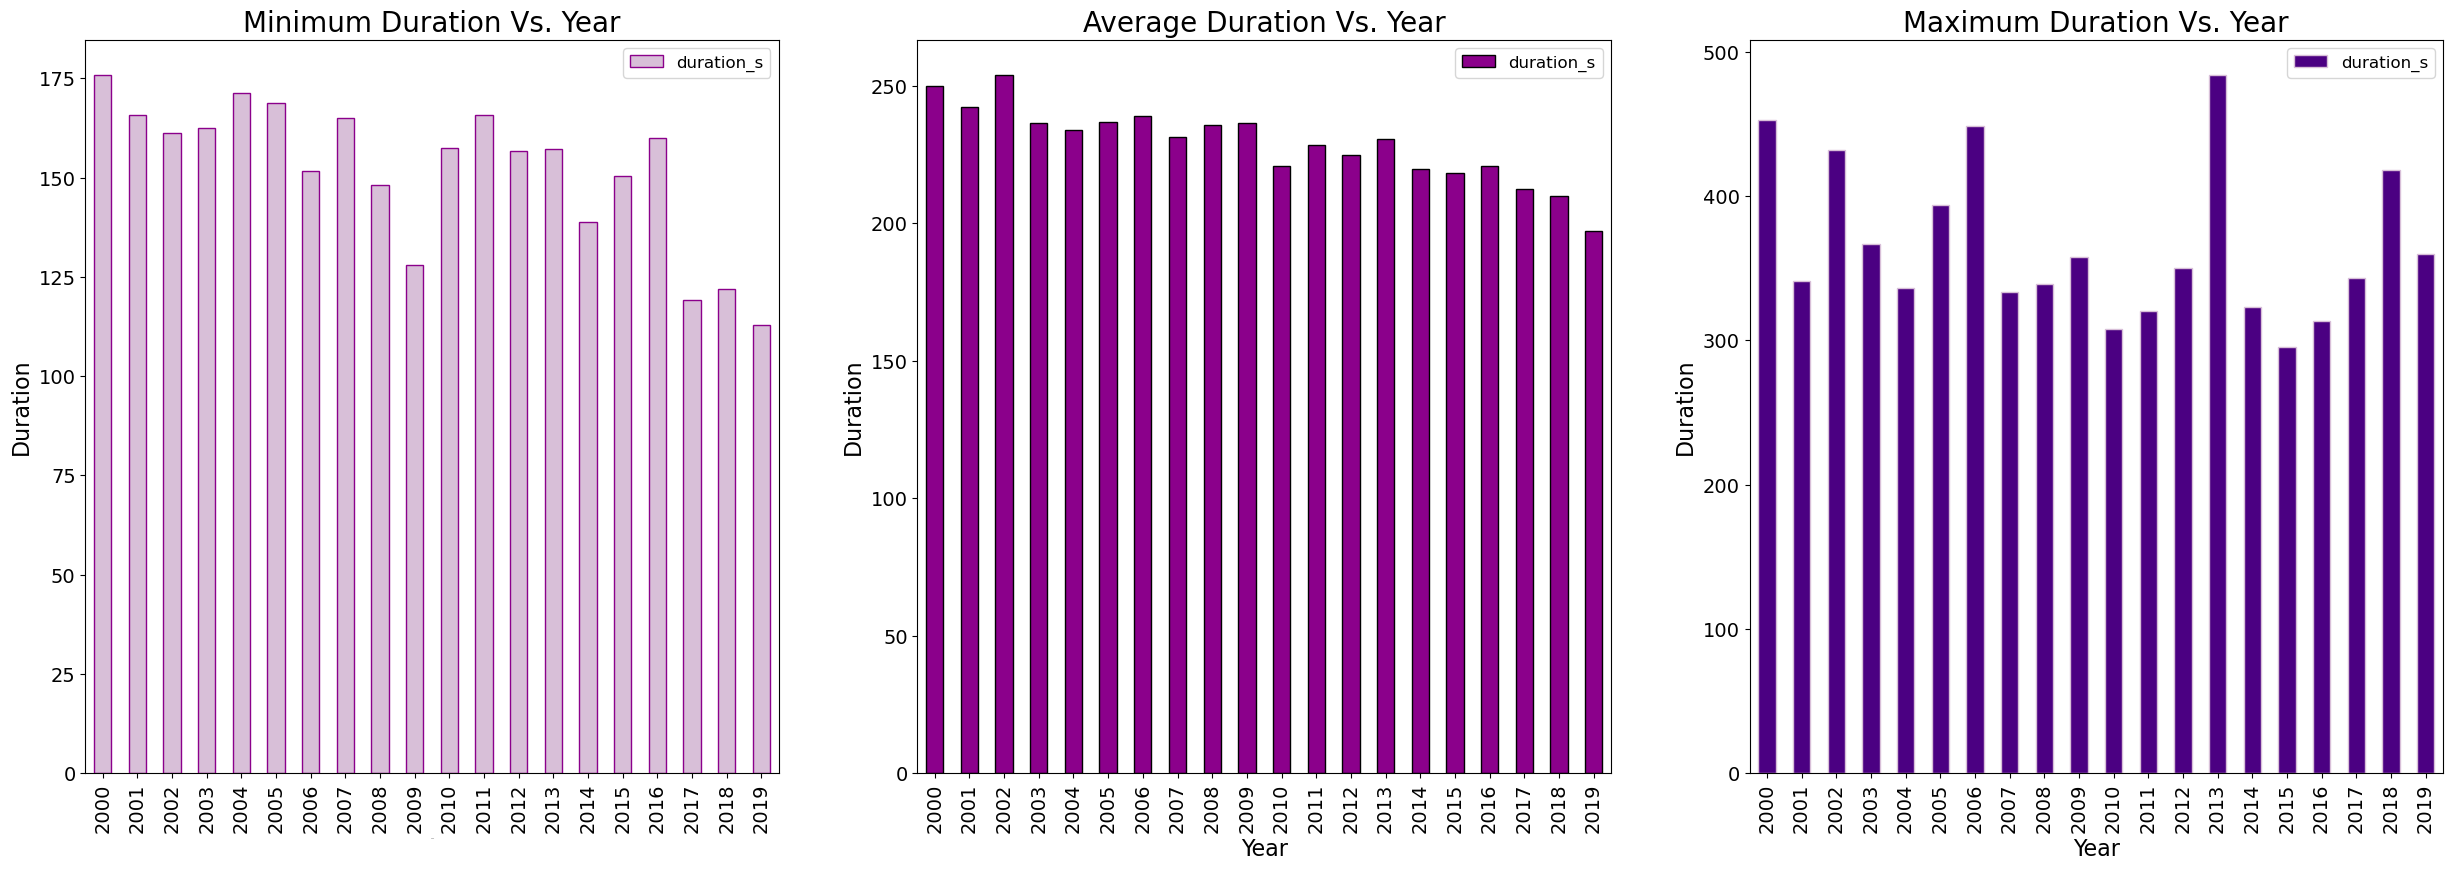

In [396]:
# plot each DataFrame on a separate subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))

fig.tight_layout()  
fig.subplots_adjust(hspace=.7, wspace=0.2)
fig.set_size_inches(25, 8)  # width = 18 inches, height = 6 inches

mindur_year.plot.bar(ax=ax1, color='thistle', edgecolor='darkmagenta')
ax1.set_title("Minimum Duration Vs. Year", fontsize=20)
ax1.set_xlabel("Year", fontsize=1)
ax1.set_ylabel("Duration", fontsize=16)
ax1.tick_params(axis='both', labelsize=14)

avgdur_year.plot.bar(ax=ax2, color='darkmagenta', edgecolor='black')
ax2.set_title("Average Duration Vs. Year", fontsize=20)
ax2.set_xlabel("Year", fontsize=16)
ax2.set_ylabel("Duration", fontsize=16)
ax2.tick_params(axis='both', labelsize=14)

maxdur_year.plot.bar(ax=ax3, color='indigo', edgecolor='thistle')
ax3.set_title("Maximum Duration Vs. Year", fontsize=20)
ax3.set_xlabel("Year", fontsize=16)
ax3.set_ylabel("Duration", fontsize=16)
ax3.tick_params(axis='both', labelsize=14)



plt.savefig('Images/duration.png')
plt.show()


#### Duration Vs. Year Analysis: Data shows that over the years the durations of songs have slight gone down with a huge decline in 2019

####	Avg bpm vs year - Grace


In [397]:
# Look at min/max of bpm to determine bin ranges. 
music_norm.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
count,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.00000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000
mean,228462.677852,2009.687145,59.837894,0.666421,0.719910,5.40475,-5.497246,0.553949,0.104592,0.128049,0.015054,0.181628,0.550057,120.066344,228.462678
std,38935.198567,5.722961,21.578814,0.140437,0.152361,3.60259,1.929175,0.497209,0.096807,0.173132,0.087584,0.140890,0.220261,26.960067,38.935199
min,113000.000000,2000.000000,0.000000,0.129000,0.054900,0.00000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,113.000000
25%,203493.000000,2005.000000,56.000000,0.581000,0.624000,2.00000,-6.476000,0.000000,0.039700,0.014000,0.000000,0.088700,0.386000,98.560000,203.493000
50%,223066.000000,2010.000000,66.000000,0.675000,0.736000,6.00000,-5.273000,1.000000,0.061000,0.055300,0.000000,0.125000,0.556000,120.014000,223.066000
75%,247426.000000,2015.000000,73.000000,0.762000,0.837000,8.00000,-4.165000,1.000000,0.132000,0.175000,0.000000,0.241000,0.727000,134.170000,247.426000
max,484146.000000,2019.000000,89.000000,0.975000,0.999000,11.00000,-0.276000,1.000000,0.576000,0.976000,0.990000,0.853000,0.973000,210.851000,484.146000


In [398]:
# Grab only the values needed and place in new dataframe. 
year_bpm = music_norm.loc[:,["year","tempo"]]

# Create a bin for bpms
bins = [60,90,120,150,180,210,240]
bpm_ranges = ["60 to 90 BPM","90 to 120 BPM","120 to 150 BPM","150 to 180 BPM","180 to 210 BPM","210 to 240 BPM"]

# Use pd.cut to place songs in bpm bins, and place df. 
year_bpm["BPM Ranges"] = pd.cut(year_bpm["tempo"], bins, labels=bpm_ranges,include_lowest=True)


Observation: Generally speaking, songs within the 90 to 150 BPM range are more popular
             than songs below 90 BPM and above 160 BPM. It is notable that around 2013
             to 2014, songs in the range of 120 to 180 BPM shot up in popularity.


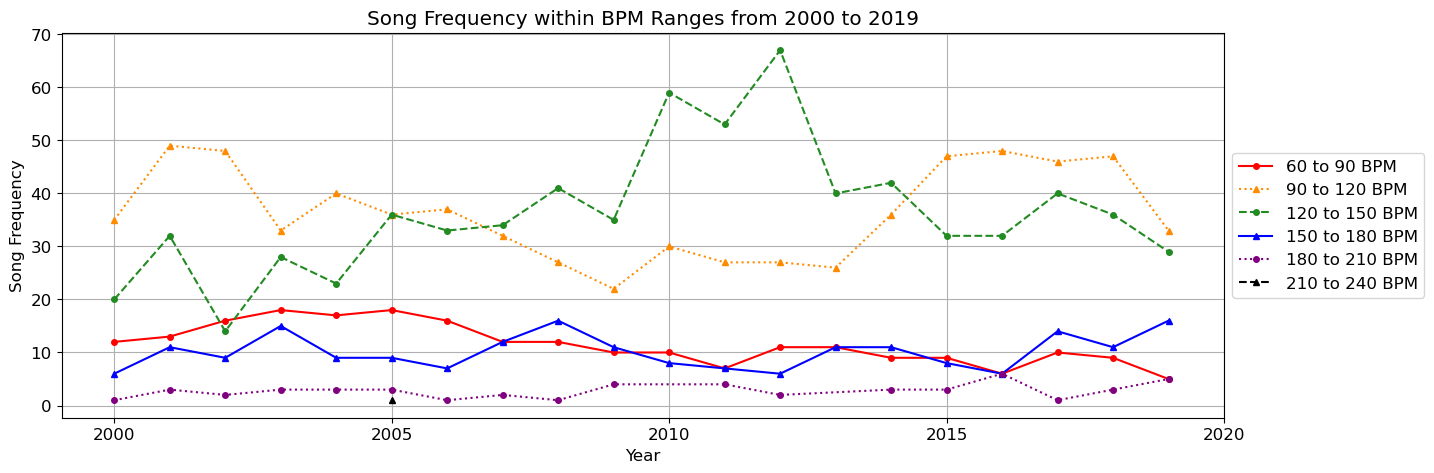

In [399]:
# Create color list, line style list, and counter for the for loop
colors = ["red","darkorange","forestgreen", "blue", "purple", "black"]
line_styles = ["-",":","--"] # for accessibility
markers = ["o","^"] # for accessibility
counter = 0

# For every bpm range, create a line chart plotting year as the x-axis and the number of counts as the y axis. 
for bpm_range in bpm_ranges:
    # Grab the range in a new dataframe
    df = year_bpm[year_bpm["BPM Ranges"] == bpm_range]
    # Get number of counts per year. 
    yearly_counts = df.groupby("year").size() 
    # Plot 
    yearly_counts.plot(kind="line", 
                       marker=markers[counter % 2], # Use modulo % to repeatedly iterate. 
                       markersize=4,
                       color=colors[counter], 
                       linestyle=line_styles[counter % 3], 
                       label= bpm_range)
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.ylabel("Song Frequency")
plt.title("Song Frequency within BPM Ranges from 2000 to 2019")
plt.xlabel("Year")

plt.xticks(np.arange(2000, 2021, 5))


print("""
Observation: Generally speaking, songs within the 90 to 150 BPM range are more popular
             than songs below 90 BPM and above 160 BPM. It is notable that around 2013
             to 2014, songs in the range of 120 to 180 BPM shot up in popularity.""")


#Save file
plt.savefig("Images/Grace_BPMvYear.png", bbox_inches='tight')


####	Valence vs Year- Pooja

### Analyzing Key/mode 



#### Key/mode vs. popularity - Pooja


#### Key/mode vs artist - Kiana 


In [400]:
#Convert Key Integer Values to Key Signatures
keys = []
for key in music_norm["key"]: 
    if key == 0:
        key = 'C'
        keys.append(key)
    elif key == 1:
        key = 'C#/Db'
        keys.append(key)
    elif key == 2:
        key = 'D'
        keys.append(key)
    elif key == 3:
        key = 'D#/Eb'
        keys.append(key)
    elif key == 4:
        key = 'E'
        keys.append(key)
    elif key == 5:
        key = 'F'
        keys.append(key)
    elif key == 6:
        key = 'F#/Gb'
        keys.append(key)
    elif key == 7:
        key = 'G'
        keys.append(key)
    elif key == 8:
        key = 'G#/Ab'
        keys.append(key)
    elif key == 9:
        key = 'A'
        keys.append(key)
    elif key == 10:
        key = 'A#/Bb'
        keys.append(key)
    elif key == 11:
        key = 'B'
        keys.append(key)

In [401]:
#Add keys to music_norm
music_norm.insert(6, 'key signature', keys)
music_norm.head()

,artist,song,duration_ms,explicit,year,popularity,key signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,C#/Db,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.0,0.3550,0.894,95.053,pop,211.160
1,Bon Jovi,It's My Life,224493,False,2000,78,C,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.0,0.3470,0.544,119.992,"rock, metal",224.493
2,*NSYNC,Bye Bye Bye,200560,False,2000,65,G#/Ab,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0,0.0845,0.879,172.656,pop,200.560
3,Eminem,The Real Slim Shady,284200,True,2000,86,F,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.0,0.0454,0.760,104.504,hip hop,284.200
4,Robbie Williams,Rock DJ,258560,False,2000,68,G,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.0,0.4670,0.861,103.035,"pop, rock",258.560


In [402]:
#find top 10 artists with the most songs in the top hits 
music_norm['artist'].value_counts().head(10)

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    18
David Guetta      18
Chris Brown       17
Kanye West        17
Taylor Swift      16
Katy Perry        16
Name: artist, dtype: int64

In [403]:
#create list of top 10 artists 
top_artists = ['Drake', 'Rihanna', 'Eminem', 'Calvin Harris', 'Britney Spears', 'David Guetta', 
               'Beyoncé', 'Kanye West', 'Taylor Swift','Katy Perry']

In [404]:
#create dataframe with just top artists and key signatures 
top_artists_df = music_norm.loc[((music_norm['artist'] == 'Drake') | 
                           (music_norm['artist'] == 'Rihanna') |
                           (music_norm['artist'] == 'Eminem') |
                           (music_norm['artist'] == 'Calvin Harris') |
                           (music_norm['artist'] == 'Britney Spears') |
                           (music_norm['artist'] == 'David Guetta') |
                           (music_norm['artist'] == 'Beyoncé') |
                           (music_norm['artist'] == 'Kanye West') |
                           (music_norm['artist'] == 'Taylor Swift') |
                           (music_norm['artist'] == 'Katy Perry'))]
#remove unused columns
top_artists_df = top_artists_df.drop(columns = ['duration_ms','song', 'mode', 'year', 'popularity', 'key', 'loudness', 'valence', 'tempo', 'genre'])
top_artists_df

,artist,explicit,key signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s
0,Britney Spears,False,C#/Db,0.751,0.834,0.0437,0.3000,0.0,0.3550,211.160
3,Eminem,True,F,0.949,0.661,0.0572,0.0302,0.0,0.0454,284.200
62,Britney Spears,False,G#/Ab,0.765,0.791,0.0317,0.2620,0.0,0.0669,206.226
66,Eminem,True,F#/Gb,0.780,0.768,0.2380,0.0371,0.0,0.5180,404.106
75,Britney Spears,False,F,0.847,0.843,0.1060,0.4150,0.0,0.1070,203.600
...,...,...,...,...,...,...,...,...,...,...
1825,Drake,True,B,0.899,0.586,0.3430,0.2790,0.0,0.0836,214.466
1836,Drake,True,G#/Ab,0.585,0.909,0.0707,0.0891,0.0,0.1190,210.746
1877,Drake,True,A#/Bb,0.831,0.502,0.0460,0.1010,0.0,0.1220,205.426
1893,Calvin Harris,False,C#/Db,0.807,0.887,0.0361,0.0160,0.0,0.0811,229.184


In [405]:
#group dataframe by 'artist'
top_grouped = top_artists_df.groupby('artist').value_counts().reset_index()

#set new column with number of songs per key signature ('count')
top_grouped = top_grouped.rename(columns = {0:'count'})

#set artist as index
top_grouped.set_index('artist')

#show dataframe
top_grouped

,artist,explicit,key signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s,count
0,Beyoncé,False,A,0.747,0.705,0.1260,0.01280,0.00,0.1260,213.506,1
1,Beyoncé,False,B,0.508,0.720,0.0628,0.27200,0.00,0.0563,261.640,1
2,Beyoncé,False,C#/Db,0.426,0.584,0.2960,0.03830,0.00,0.1880,193.213,1
3,Beyoncé,False,C#/Db,0.655,0.488,0.2200,0.08250,0.00,0.2210,244.826,1
4,Beyoncé,False,C#/Db,0.694,0.825,0.1110,0.08950,0.00,0.0618,208.066,1
...,...,...,...,...,...,...,...,...,...,...,...
179,Taylor Swift,False,F#/Gb,0.687,0.771,0.0384,0.16400,0.00,0.1120,231.146,1
180,Taylor Swift,False,G,0.646,0.794,0.1900,0.08850,0.00,0.2010,211.933,1
181,Taylor Swift,False,G,0.647,0.800,0.1650,0.06470,0.00,0.3340,219.200,1
182,Taylor Swift,False,G,0.661,0.729,0.0376,0.00215,0.00,0.0477,232.120,1


In [406]:
#pivot grouped dataframe
top_pivot = top_grouped.pivot_table(values='count', index = 'artist', columns = 'key signature', aggfunc = 'first')

#replace NaN values with 0
top_pivot = top_pivot.fillna(0)

#show dataframe
top_pivot

key signature,A,A#/Bb,B,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab
artist,,,,,,,,,,,,
Beyoncé,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Britney Spears,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Calvin Harris,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
David Guetta,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
Drake,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Eminem,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
Kanye West,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
Katy Perry,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
Rihanna,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0


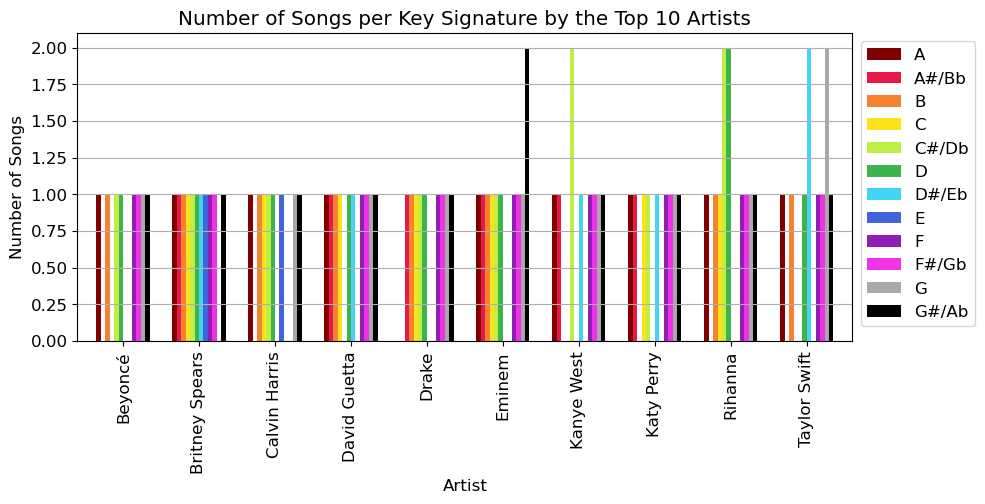

In [407]:
#Plot count of key signatures used per artist in the 10 ten
top_pivot.plot.bar(rot=90, figsize = (10, 4), width = 0.7, xlabel = 'Artist', ylabel='Number of Songs',
                   color = ['#800000','#e6194B' ,'#f58231' ,'#ffe119' ,'#bfef45' ,'#3cb44b' ,'#42d4f4','#4363d8' ,'#911eb4' ,
                           '#f032e6','#a9a9a9' ,'#000000'])

#configure plot details
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.title('Number of Songs per Key Signature by the Top 10 Artists')
plt.grid(axis = 'y')

#save plot
# plt.savefig('/Assets/Kiana_KeyvArtist.png', dpi=300)

#show plot
plt.show()

#### Key/mode vs year - Kiana

In [408]:
#separate dataframes by key signature
c_key = music_norm.loc[((music_norm['key signature']=='C'))]
cd_key = music_norm.loc[((music_norm['key signature']=='C#/Db'))]
d_key = music_norm.loc[((music_norm['key signature']=='D'))]
de_key = music_norm.loc[((music_norm['key signature']=='D#/Eb'))]
e_key = music_norm.loc[((music_norm['key signature']=='E'))]
f_key = music_norm.loc[((music_norm['key signature']=='F'))]
fg_key = music_norm.loc[((music_norm['key signature']=='F#/Gb'))]
g_key = music_norm.loc[((music_norm['key signature']=='G'))]
ga_key = music_norm.loc[((music_norm['key signature']=='G#/Ab'))]
a_key = music_norm.loc[((music_norm['key signature']=='A'))]
ab_key = music_norm.loc[((music_norm['key signature']=='A#/Bb'))]
b_key = music_norm.loc[((music_norm['key signature']=='B'))]

In [409]:
#for each key signature df use .nunique() to get #of songs/key signature/year
c_key_year = c_key.groupby(['year']).nunique()
cd_key_year = cd_key.groupby(['year']).nunique()
d_key_year = d_key.groupby(['year']).nunique()
de_key_year = de_key.groupby(['year']).nunique()
e_key_year = e_key.groupby(['year']).nunique()
f_key_year = f_key.groupby(['year']).nunique()
fg_key_year = fg_key.groupby(['year']).nunique()
g_key_year = g_key.groupby(['year']).nunique()
ga_key_year = ga_key.groupby(['year']).nunique()
a_key_year = a_key.groupby(['year']).nunique()
ab_key_year = ab_key.groupby(['year']).nunique()
b_key_year = b_key.groupby(['year']).nunique()

In [410]:
#simplify dataframes by remove unecessary columns
c_key_year = c_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
cd_key_year = cd_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
d_key_year = d_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
de_key_year = de_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
e_key_year = e_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
f_key_year = g_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
fg_key_year = fg_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
g_key_year = g_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
ga_key_year = ga_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
a_key_year = a_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
ab_key_year = ab_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])
b_key_year = b_key_year.drop(columns = ['artist', 'duration_ms', 'popularity', 'key', 'key signature', 'loudness', 'mode', 'valence', 'tempo', 'genre'])

In [411]:
#rename columns to match key signatures 
c_key_year = c_key_year.rename(columns = {'song':'C'})
cd_key_year = cd_key_year.rename(columns = {'song':'C#/Db'})
d_key_year = d_key_year.rename(columns = {'song':'D'})
de_key_year = de_key_year.rename(columns = {'song':'D#/Eb'})
e_key_year = e_key_year.rename(columns = {'song':'E'})
f_key_year = f_key_year.rename(columns = {'song':'F'})
fg_key_year = fg_key_year.rename(columns = {'song':'F#/Gb'})
g_key_year = g_key_year.rename(columns = {'song':'G'})
ga_key_year = ga_key_year.rename(columns = {'song':'G#/Ab'})
a_key_year = a_key_year.rename(columns = {'song':'A'})
ab_key_year = ab_key_year.rename(columns = {'song':'A#/Bb'})
b_key_year = b_key_year.rename(columns = {'song':'B'})

In [412]:
#concatenate dataframes into single df
song_counts = pd.concat([c_key_year, cd_key_year, d_key_year, de_key_year, e_key_year, f_key_year, 
                   fg_key_year, g_key_year, ga_key_year, a_key_year, ab_key_year, b_key_year], axis=1)

#replace NaN values with 0
song_counts = song_counts.fillna(0)

In [413]:
#create dataframe with count of total songs per year 
count_by_year = music_norm['year'].value_counts().reset_index()

#rename columns
count_by_year = count_by_year.rename(columns = {'index':'year', 'year':'total songs'})

#set year as index
count_by_year = count_by_year.set_index('year')

In [414]:
#concatenate with previous df to form final song count df
song_counts_final = pd.concat([song_counts, count_by_year], axis = 1)

#show dataframe
song_counts_final

,C,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s,C#/Db,...,B,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s,total songs
year,,,,,,,,,,,,,,,,,,,,,
2000,9,2,9,9,9,9,1,9,9,9,...,7,2,7,7,7,7,3,7,7,74
2001,10,2,10,10,10,10,4,10,10,12,...,10,2,10,10,10,10,3,10,10,108
2002,4,2,4,4,4,4,1,4,4,11,...,6,2,6,6,6,6,1,6,6,89
2003,5,2,5,5,5,5,1,5,5,14,...,8,2,8,7,8,8,3,8,8,97
2004,6,2,6,6,6,6,1,6,6,9,...,7,2,7,7,7,7,1,7,7,92
2005,12,2,12,12,12,12,2,12,12,17,...,7,2,7,7,7,7,3,7,7,103
2006,10,2,10,10,10,10,2,10,10,11,...,7,2,7,7,7,7,1,7,7,94
2007,4,1,4,4,4,4,2,4,4,14,...,7,2,7,7,7,7,1,7,7,92
2008,12,2,12,12,12,12,1,11,12,14,...,9,2,8,9,9,9,1,8,9,97


In [415]:
#bin songs for every 5 years
bins = [2000, 2005, 2010, 2015, 2019]
year_ranges = ['2000-2004', '2005-2009', '2010-2014', '2015-2019']

song_counts_final['Year Ranges'] = pd.cut(song_counts_final.index, bins, labels = year_ranges, include_lowest= True)

#show dataframe
song_counts_final

,C,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s,C#/Db,...,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s,total songs,Year Ranges
year,,,,,,,,,,,,,,,,,,,,,
2000,9,2,9,9,9,9,1,9,9,9,...,2,7,7,7,7,3,7,7,74,2000-2004
2001,10,2,10,10,10,10,4,10,10,12,...,2,10,10,10,10,3,10,10,108,2000-2004
2002,4,2,4,4,4,4,1,4,4,11,...,2,6,6,6,6,1,6,6,89,2000-2004
2003,5,2,5,5,5,5,1,5,5,14,...,2,8,7,8,8,3,8,8,97,2000-2004
2004,6,2,6,6,6,6,1,6,6,9,...,2,7,7,7,7,1,7,7,92,2000-2004
2005,12,2,12,12,12,12,2,12,12,17,...,2,7,7,7,7,3,7,7,103,2000-2004
2006,10,2,10,10,10,10,2,10,10,11,...,2,7,7,7,7,1,7,7,94,2005-2009
2007,4,1,4,4,4,4,2,4,4,14,...,2,7,7,7,7,1,7,7,92,2005-2009
2008,12,2,12,12,12,12,1,11,12,14,...,2,8,9,9,9,1,8,9,97,2005-2009


In [416]:
#group by year ranges
song_counts_final = song_counts_final.groupby('Year Ranges').sum()

#show dataframe
song_counts_final

,C,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s,C#/Db,...,B,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,duration_s,total songs
Year Ranges,,,,,,,,,,,,,,,,,,,,,
2000-2004,46,12,46,46,46,46,10,46,46,72,...,45,12,45,44,45,45,14,45,45,563
2005-2009,43,9,43,42,43,43,7,42,43,60,...,47,10,45,47,47,47,5,46,47,472
2010-2014,47,9,47,47,46,47,11,47,47,59,...,44,10,44,44,44,44,6,43,44,499
2015-2019,48,8,48,48,47,48,7,47,48,52,...,51,8,51,50,50,51,8,50,51,403


In [417]:
#create dataframe with song percentages per year range
song_percents = pd.DataFrame({'C': round((song_counts_final['C']/song_counts_final['total songs'])*100, 1), 
                 'C#/Db': round((song_counts_final['C#/Db']/song_counts_final['total songs'])*100, 1),
                 'D': round((song_counts_final['D']/song_counts_final['total songs'])*100, 1),
                 'D#/Eb': round((song_counts_final['D#/Eb']/song_counts_final['total songs'])*100, 1),
                 'E': round((song_counts_final['E']/song_counts_final['total songs'])*100, 1),             
                 'F': round((song_counts_final['F']/song_counts_final['total songs'])*100, 1),
                 'F#/Gb': round((song_counts_final['F#/Gb']/song_counts_final['total songs'])*100, 1),
                 'G': round((song_counts_final['G']/song_counts_final['total songs'])*100, 1),
                 'G#/Ab': round((song_counts_final['G#/Ab']/song_counts_final['total songs'])*100, 1), 
                 'A': round((song_counts_final['A']/song_counts_final['total songs'])*100, 1),
                 'A#/Bb': round((song_counts_final['A#/Bb']/song_counts_final['total songs'])*100, 1), 
                 'B': round((song_counts_final['B']/song_counts_final['total songs'])*100, 1)},
                 index = song_counts_final.index)

#show dataframe
song_percents

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B
Year Ranges,,,,,,,,,,,,
2000-2004,8.2,12.8,7.8,3.0,7.8,9.1,9.4,9.1,8.3,6.6,6.6,8.0
2005-2009,9.1,12.7,6.8,3.6,5.9,10.4,6.1,10.4,9.3,6.6,7.0,10.0
2010-2014,9.4,11.8,6.6,3.2,6.4,11.2,6.6,11.2,7.0,9.6,5.4,8.8
2015-2019,11.9,12.9,9.7,1.5,4.0,8.2,7.2,8.2,8.7,7.9,5.2,12.7


In [418]:
#transpose song_percents df 
transposed_df = song_percents.transpose()

#show dataframe
transposed_df

Year Ranges,2000-2004,2005-2009,2010-2014,2015-2019
C,8.2,9.1,9.4,11.9
C#/Db,12.8,12.7,11.8,12.9
D,7.8,6.8,6.6,9.7
D#/Eb,3.0,3.6,3.2,1.5
E,7.8,5.9,6.4,4.0
F,9.1,10.4,11.2,8.2
F#/Gb,9.4,6.1,6.6,7.2
G,9.1,10.4,11.2,8.2
G#/Ab,8.3,9.3,7.0,8.7
A,6.6,6.6,9.6,7.9


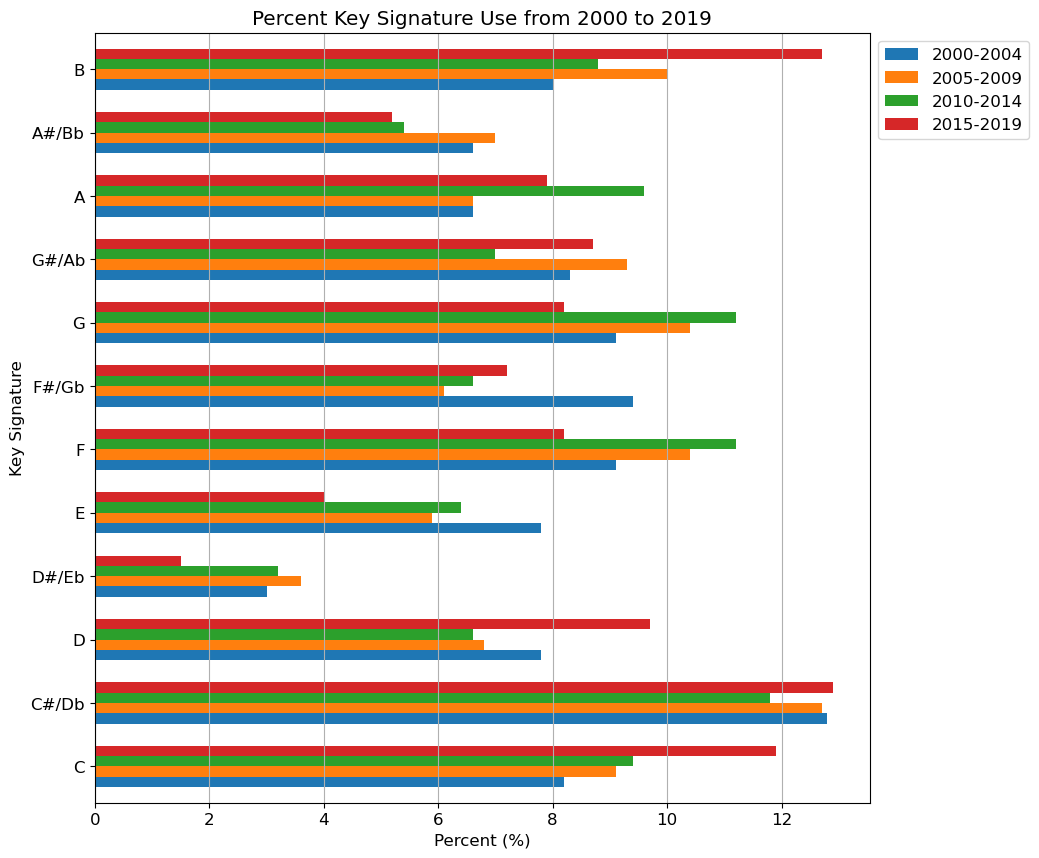

In [419]:
#plot percentage of keys per year range 
transposed_df.plot.barh(rot=0, figsize = (10, 10), width = 0.65, xlabel = 'Key Signature', ylabel='Percent')

#configure plot details
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.title('Percent Key Signature Use from 2000 to 2019')
plt.xlabel('Percent (%)')
plt.ylabel('Key Signature')
plt.grid(axis = 'x')

#save plot
# plt.savefig('/Assets/Kiana_KeyvYear.png', dpi=300)

#show plot
plt.show()